In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
X, cmaps_dict = load_mat_img(img='lighthouse.mat', img_info='X', cmap_info={'map', 'map2'})
from cued_sf2_lab.laplacian_pyramid import bpp
from cued_sf2_lab.laplacian_pyramid import quantise
import numpy as np
import os
from pympler import asizeof
from my_DWT import *

(256, 256)
ESITMATED 61.674769597598406 kB
REAL 58.805 kB


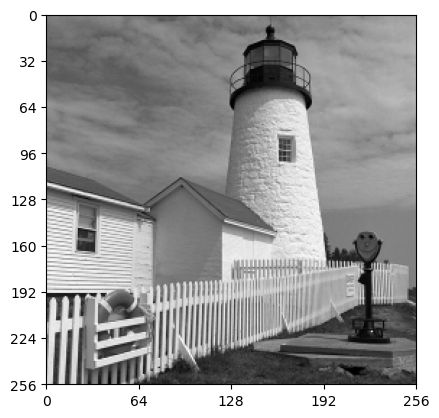

In [30]:
fig, ax = plt.subplots()
plot_image(X, ax=ax);
print(X.shape)

def image_size_bits(image):
    return bpp(image) * image.shape[0] * image.shape[1]
original_image_size = image_size_bits(X)
print('ESITMATED', original_image_size*0.000125, 'kB')
print('REAL', os.stat('lighthouse.mat').st_size/1000, 'kB')

In [89]:
import numpy as np

class PCA2:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None

    def fit(self, X):
        # Compute the mean
        self.mean_ = np.mean(X, axis=0)

        # Center the data
        X_centered = X - self.mean_

        # Compute the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Perform eigendecomposition
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Sort eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_indices]
        sorted_eigenvectors = eigenvectors[:, sorted_indices]

        # Select the top n_components eigenvectors
        self.components_ = sorted_eigenvectors[:, :self.n_components]
        
        return self.components_

    def transform(self, X):
        # Center the data
        X_centered = X - self.mean_

        # Project the data onto the principal components
        transformed_data = np.dot(X_centered, self.components_)

        return transformed_data

    def inverse_transform(self, transformed_data):
        # Reconstruct the data from the transformed representation
        reconstructed_data = np.dot(transformed_data, self.components_.T) + self.mean_

        return reconstructed_data


(256, 100)
(256, 256)
183335.9898356976


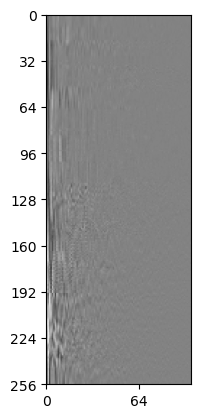

In [106]:
num_components = 100
pca = PCA(num_components)
pca.fit(X)
reduced = pca.transform(X)
fig, ax = plt.subplots()
plot_image(reduced, ax=ax);
print(np.shape(reduced))
inv_reduced = pca.inverse_transform(reduced)
print(inv_reduced.shape)

pca_image_size = image_size_bits(reduced)
print(pca_image_size)

In [91]:
#If transmitting pca in header file
pca = PCA(num_components)
pca.fit(X)
asizeof.asizeof(pca)

527088

In [107]:
X, cmaps_dict = load_mat_img(img='lighthouse.mat', img_info='X', cmap_info={'map', 'map2'})


# Compute the mean
n_components = 20

mean = np.mean(X, axis=0)

# Center the data
X_centered = X - mean

# Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Select the top n_components eigenvectors
components = sorted_eigenvectors[:, :n_components]


In [119]:
X, cmaps_dict = load_mat_img(img='lighthouse.mat', img_info='X', cmap_info={'map', 'map2'})
X = X-128
#5-layer DWT
dwt_x = DWT(X,N=7)
ratios = get_ratios(dwt_x, N, g1, g2)
factors = get_factors(dwt_x, N)

TypeError: quantdwt() missing 4 required positional arguments: 'Y', 'dwtstep', 'factors', and 'strength'